$\textbf{Original Algorithm}$

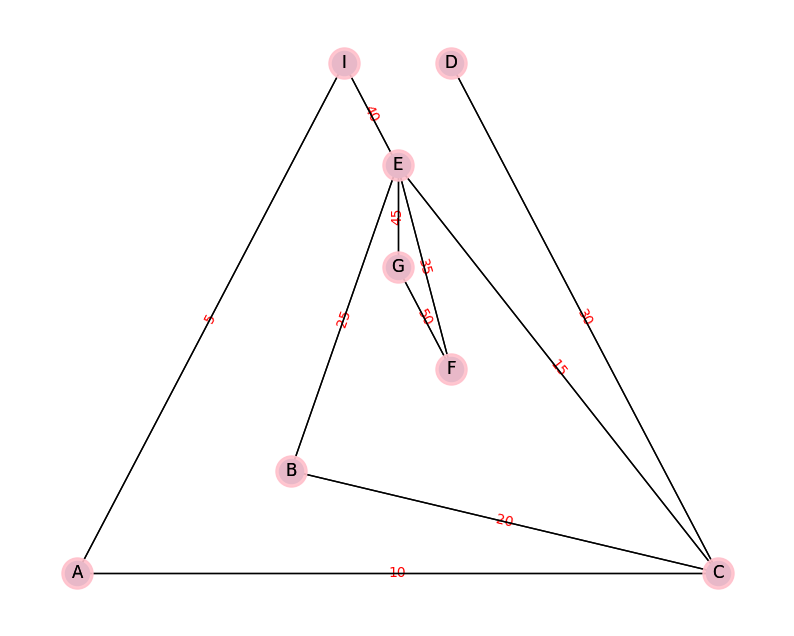

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
seed = 55
# Use seed for reproducibility
G = nx.Graph()
plt.figure(figsize=(10, 8))
# Add nodes
G.add_nodes_from(["A","B","C","D","E","F","G"])
# Add self-loops to the remaining nodes
edgelist = [("A","C"),("A","I"),("C","B"),("C","E"),("C","D"),("B","E"),("I","E"),("E","F"),("F","G"),("G","E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)  # Seed for reproducible layout
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A","C"):10,("A","I"):5,("C","B"):20,("C","E"):15,("C","D"):30,("B","E"):25,("I","E"):40,("E","F"):35,("F","G"):50,("G","E"):45},
    font_color='red'
)
nx.draw(G, pos=pos,with_labels=True)
nx.draw(
    G, pos, edge_color='black', width=1, linewidths=1,
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True)

plt.show()

$\textbf{Kruskal's Algorithm}$

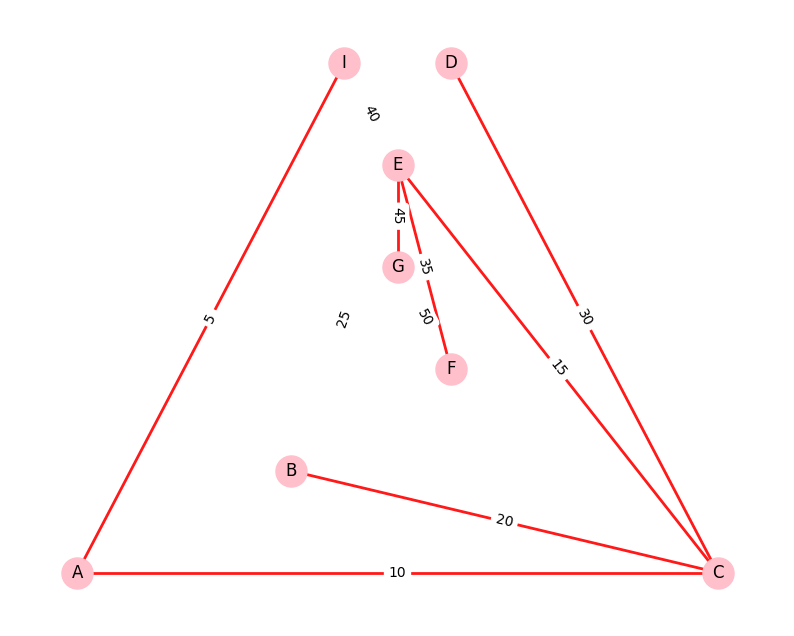

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C", 10), ("A", "I", 5), ("C", "B", 20), ("C", "E", 15), ("C", "D", 30),
            ("B", "E", 25), ("I", "E", 40), ("E", "F", 35), ("F", "G", 50), ("G", "E", 45)]

for edge in edgelist:
    G.add_edge(edge[0], edge[1], weight=edge[2])
    
T = nx.minimum_spanning_tree(G)
edge_colors = ['red' if edge in T.edges() else 'black' for edge in G.edges()]
pos = nx.planar_layout(G)
plt.figure(figsize=(10, 8))
nx.draw_networkx_edges(G, pos, edgelist=T.edges(), edge_color='red', width=2, alpha=0.9)
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='pink')
nx.draw_networkx_labels(G, pos)
plt.axis('off') 
plt.show()


| Iteration Number | Edge Considered | Weight | Action Taken |
|------------------|-----------------|--------|--------------|
| 1                | (A, I)          | 5      | Added        |
| 2                | (A, C)          | 10     | Added        |
| 3                | (C, E)          | 15     | Added        |
| 4                | (B, E)          | 25     | Ignored      |
| 5                | (E, F)          | 35     | Added        |
| 6                | (G, E)          | 45     | Added        |
| 7                | (C, B)          | 20     | Ignored      |
| 8                | (C, D)          | 30     | Ignored      |
| 9                | (I, E)          | 40     | Ignored      |
| 10               | (F, G)          | 50     | Ignored      |




$\textbf{Prim's Algorithm}$

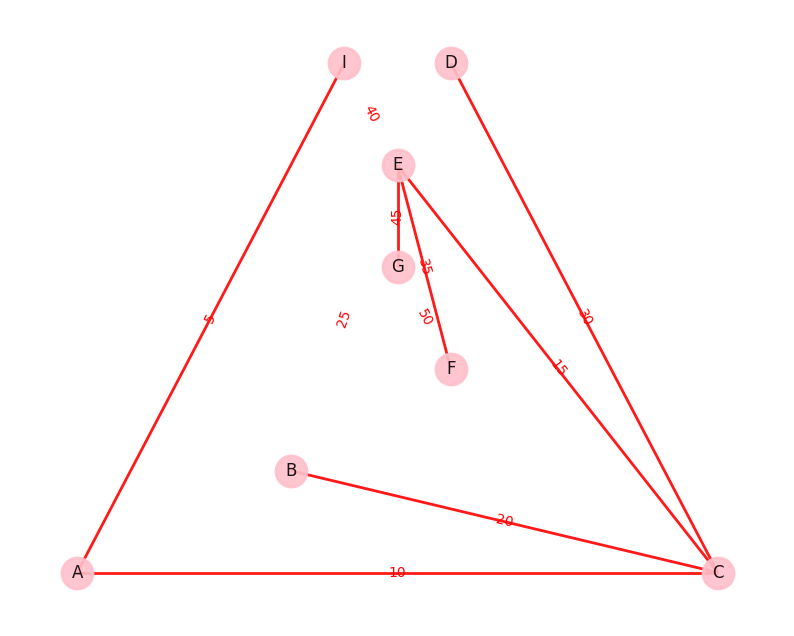

In [7]:
import matplotlib.pyplot as plt
import networkx as nx

seed = 55
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"), ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]
G.add_edges_from(edgelist)
excluded_edges = [("B", "E"), ("I", "E"), ("F", "G")]
T_prim = prim(G, 'A')
pos = nx.planar_layout(G)

nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45},
    font_color='red'
)

nx.draw(
    G, pos, edgelist=T_prim.edges(), edge_color='red', width=2, linewidths=2,  
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)
def prim(G, start):
    A = nx.Graph()
    A.add_node(start)
    while set(A.nodes()) != set(G.nodes()):
        nodes_to_iterate = list(A.nodes())
        min_edge = None
        min_weight = float('inf')
        for n in nodes_to_iterate:
            for e in G.edges(n):
                if e[1] not in A.nodes() and e not in excluded_edges:
                    A.add_edge(e[0], e[1])
    return A
plt.show()


| Iteration | Vertex Added | Edge Added | Weight |
|-----------|--------------|------------|--------|
| 0         | I            |            |        |
| 1         | A            | (I, A)     | 5      |
| 2         | C            | (A, C)     | 10     |
| 3         | E            | (C, E)     | 15     |
| 4         | B            | (C, B)     | 20     |
| 5         | D            | (C, D)     | 30     |
| 6         | F            | (E, F)     | 35     |
| 7         | G            | (E, G)     | 45     |


$\textbf{Djitraka's Shortest Path Algorithm}$

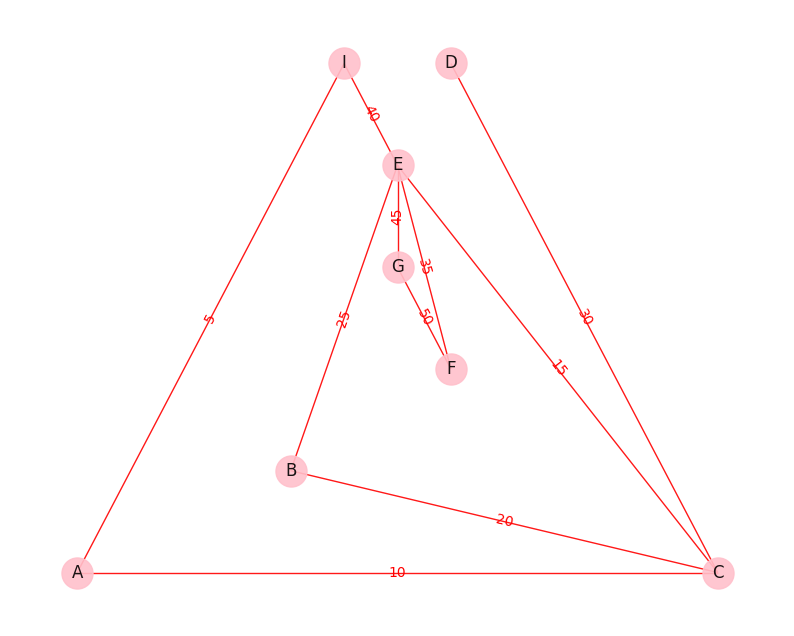

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

seed = 55
G = nx.Graph()
plt.figure(figsize=(10, 8))
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G"])
edgelist = [("A", "C"), ("A", "I"), ("C", "B"), ("C", "E"), ("C", "D"), ("B", "E"), ("I", "E"), ("E", "F"), ("F", "G"), ("G", "E")]
G.add_edges_from(edgelist)
pos = nx.planar_layout(G)
nx.draw_networkx_edge_labels(
    G, pos,
    edge_labels={("A", "C"): 10, ("A", "I"): 5, ("C", "B"): 20, ("C", "E"): 15, ("C", "D"): 30, ("B", "E"): 25, ("I", "E"): 40, ("E", "F"): 35, ("F", "G"): 50, ("G", "E"): 45},
    font_color='red'
)
nx.draw(
    G, pos=pos, edge_color='red',  # Set edge color to red
    node_size=500, node_color='pink', alpha=0.9,
    with_labels=True
)
plt.show()



| From / To | A | B | C | D | E | F | G | I |
|-----------|---|---|---|---|---|---|---|---|
| A         | 0 | 30| 10| 40| 25| 60| 70| 5 |
| B         | 30| 0 | 20| 50| 25| 60| 70| 35|
| C         | 10| 20| 0 | 30| 15| 50| 60| 15|
| D         | 40| 50| 30| 0 | 45| 80| 90| 45|
| E         | 25| 25| 15| 45| 0 | 35| 45| 30|
| F         | 70| 70| 60| 90| 35| 0 | 50| 65|
| G         | 70| 60| 45| 75| 45| 50| 0 | 75|
| I         | 5 | 35| 15| 45| 30| 65| 75| 0 |
